## COVID Daily casualties Analysis Table and Heat Map 
  daily casualties by groups : ~ halt-two Thousand / Day ( US France  UK with decrease in Spain Italy ) ~ half-two hundred / day ( Iran Netherlands Germany watch for dangerous rise ) 
   ### Daily Calculus  below: 
  - source : World Stats Evolution per Coutry & Type (John Hopkins)
     - Web https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
     - storage and computation resources thanks to  - http://Github.com , http://Jupyter.org  , http://MyBinder.org 

In [1]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.4 MB/s eta 0:00:01    |███████████████████████████████ | 9.7 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 63.3 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 37 kB/s s eta 0:00:01    |█████████▍                      | 5.9 MB 48.3 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 112 kB/s  eta 0:00:01
     |████████████████████████████████| 12.4 MB 33.8 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 6.6 MB/s  eta 0:00:01


In [2]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0    914      0 --:--:-- --:--:-- --:--:--   914
100 50898  100 50898    0     0   147k      0 --:--:-- --:--:-- --:--:--  147k


In [3]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [4]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df[cols20] )

,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
Country/Region,,,,,,,,,,,,,
Algeria,25,26,29,31,35,44,58,86,105,130,152,173,193
Austria,49,58,68,86,108,128,146,158,168,186,204,220,243
Belgium,220,289,353,431,513,705,828,1011,1143,1283,1447,1632,2035
Brazil,77,92,111,136,159,201,240,324,359,445,486,564,686
Canada,13,18,18,21,31,33,37,53,67,94,119,150,153
Canada,8,18,22,22,22,31,33,36,61,61,75,121,150
China,3169,3174,3177,3182,3186,3187,3193,3199,3203,3207,3210,3212,3212
Denmark,41,52,65,72,77,90,104,123,139,161,179,187,203
Ecuador,34,36,48,58,60,75,93,120,145,172,180,191,191


In [5]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [6]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(13)
display(df9) 

,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
Country/Region,,,,,,,,,,,,
US,372,445,441,511,895,884,1169,1161,1320,1212,1164,1939
France,299,319,292,418,499,509,1355,1120,1053,518,833,1417
United Kingdom,181,260,209,180,381,563,569,684,708,621,439,786
Spain,773,844,821,913,748,923,961,850,749,694,700,704
Italy,919,889,756,812,837,727,760,766,681,525,636,604
Belgium,69,64,78,82,192,123,183,132,140,164,185,403
Netherlands,112,93,132,93,175,134,166,148,164,115,101,234
Germany,75,91,100,112,130,145,187,168,169,140,226,206
Iran,144,139,123,117,141,138,124,134,158,151,136,133


In [7]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
372,445,441,511,895,884,1169,1161,1320,1212,1164,1939"
data-datasets="299,319,292,418,499,509,1355,1120,1053,518,833,1417"
data-datasets="181,260,209,180,381,563,569,684,708,621,439,786"
data-datasets="773,844,821,913,748,923,961,850,749,694,700,704"
data-datasets="919,889,756,812,837,727,760,766,681,525,636,604"
data-datasets="69,64,78,82,192,123,183,132,140,164,185,403"
data-datasets="112,93,132,93,175,134,166,148,164,115,101,234"
data-datasets="75,91,100,112,130,145,187,168,169,140,226,206"
data-datasets="144,139,123,117,141,138,124,134,158,151,136,133"
data-datasets="15,19,25,23,42,39,84,35,86,41,78,122"
data-datasets="28,0,5,36,34,59,69,50,15,28,76,114"
data-datasets="17,16,23,37,46,63,79,69,76,73,75,76"
data-datasets="40,33,36,59,74,55,48,55,75,49,50,56


In [8]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Algeria,Austria,Belgium,Brazil,Canada,Canada,China,Denmark,Ecuador,France,...,Philippines,Poland,Portugal,Romania,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
3/27/20,1,9,69,15,5,10,5,11,2,299,...,9,0,16,3,773,28,40,17,181,372
3/28/20,3,10,64,19,0,4,3,13,12,319,...,14,2,24,11,844,0,33,16,260,445
3/29/20,2,18,78,25,3,0,5,7,10,292,...,3,4,19,6,821,5,36,23,209,441
3/30/20,4,22,82,23,10,0,4,5,2,418,...,7,9,21,22,913,36,59,37,180,511
3/31/20,9,20,192,42,2,9,1,13,15,499,...,10,2,20,17,748,34,74,46,381,895
4/1/20,14,18,123,39,4,2,6,14,18,509,...,8,10,27,10,923,59,55,63,563,884
4/2/20,28,12,183,84,16,3,6,19,27,1355,...,11,14,22,23,961,69,48,79,569,1169
4/3/20,19,10,132,35,14,25,4,16,25,1120,...,29,14,37,18,850,50,55,69,684,1161
4/4/20,25,18,140,86,27,0,4,22,27,1053,...,8,8,20,13,749,15,75,76,708,1320
4/5/20,22,18,164,41,25,14,3,18,8,518,...,8,15,29,5,694,28,49,73,621,1212


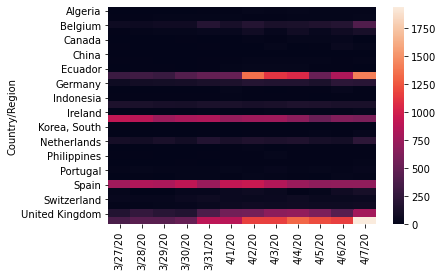

In [9]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

30 16.166666666666668


Country/Region
Algeria           0.9
Austria           1.4
Belgium           2.2
Brazil            1.7
Canada            0.8
Canada            3.0
China             0.2
Denmark           0.6
Ecuador           0.2
France            1.0
Germany           1.3
India             3.6
Indonesia         1.1
Iran              0.9
Ireland           1.3
Italy             0.9
Korea, South      1.1
Mexico            2.0
Netherlands       1.1
Peru              1.3
Philippines       0.7
Poland            1.6
Portugal          0.9
Romania           1.5
Spain             0.9
Sweden            2.9
Switzerland       0.8
Turkey            1.0
United Kingdom    0.9
US                1.3
dtype: float64

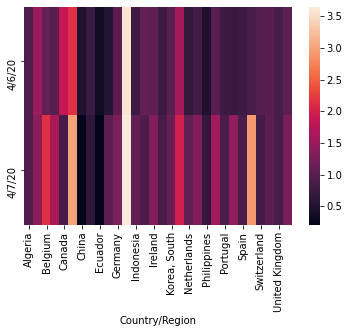

In [10]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [11]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/7/20
Country/Region,
Mexico,2.914530
Sweden,2.580247
Belgium,2.538946
Canada,2.416667
Brazil,2.259259
Poland,2.141593
Ireland,2.106383
US,1.914460
France,1.870515


In [12]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)